In [1]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 8.7 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=fb36700d37891aea9d55a6bd53b7c160e80c6a42299f86b3523ac5aad8a89bc3
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

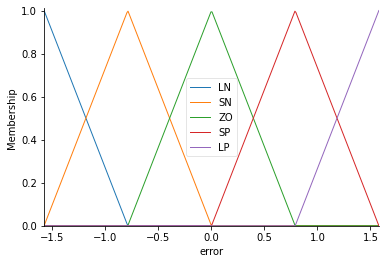

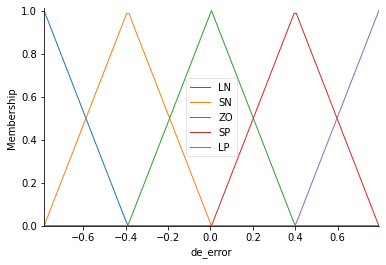

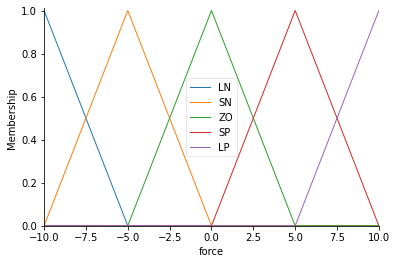

In [6]:
error = ctrl.Antecedent(np.arange(-np.pi/2,np.pi/2+0.01,0.01),"error")
de_error = ctrl.Antecedent(np.arange(-np.pi/4,np.pi/4+0.01,0.01),'de_error')
force = ctrl.Consequent(np.arange(-10,10+0.01,0.01),"force")
error.automf(names = ["LN","SN","ZO","SP","LP"])
de_error.automf(names = ["LN","SN","ZO","SP","LP"])
force.automf(names = ["LN","SN","ZO","SP","LP"])

error.view()
de_error.view()
force.view()

In [7]:
rule1 = ctrl.Rule((error["LN"]|(de_error["LN"] or de_error["SN"])) or (error["SN"]|(de_error["LN"] or de_error["SN"])),force["LN"])
rule2 = ctrl.Rule((error["ZO"]|(de_error["LN"] or de_error["SN"])) or (de_error["ZO"]|(error["LN"] or error["SN"])),force["SN"])
rule3 = ctrl.Rule((error["LN"]|de_error["LP"]) or (error["SN"]|de_error["SP"]) or (error["ZO"]|de_error["ZO"]) or (error["SP"]|de_error["SN"]) or (error["LP"]|de_error["LN"]),force["ZO"])
rule4 = ctrl.Rule((error["LP"]|(de_error['SN'] or de_error["ZO"])) or (error["SP"]|de_error["ZO"]) or (error["ZO"]|de_error["SP"]) or (de_error["LP"]|(error['SN'] or error["ZO"])),force["SP"])
rule5 = ctrl.Rule((error["LP"]|(de_error["LP"] or de_error["SP"])) or (error["SP"]|(de_error["LP"] or de_error["SP"])),force["LP"])

-2.502477264756675


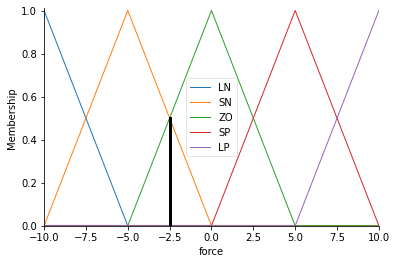

In [10]:
force_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
force_con = ctrl.ControlSystemSimulation(force_ctrl)
force_con.input["error"] = -np.pi/4
force_con.input["de_error"] = np.pi/8
force_con.compute() 
print(force_con.output["force"])
force.view(sim = force_con)